In [1]:
import pandas as pd
import numpy as np

In [2]:
Cdf = pd.read_csv('German Credit Data.csv')
Cdf

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,1736,A61,A74,3,A92,4,31,A143,1,A172,0
996,A11,30,A32,3857,A61,A73,4,A91,4,40,A143,1,A174,0
997,A14,12,A32,804,A61,A75,4,A93,4,38,A143,1,A173,0
998,A11,45,A32,1845,A61,A73,4,A93,4,23,A143,1,A173,1


In [3]:
# https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

Cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [4]:
Cdf['status'].value_counts()

# 0 = goos, 1= bad

0    700
1    300
Name: status, dtype: int64

In [5]:
Xf = list(Cdf.columns)
Xf.remove('status')
Xf

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [6]:
Cdfen = pd.get_dummies(Cdf[Xf], drop_first=True)

In [7]:
list(Cdfen.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [8]:
X = Cdfen
y  = Cdf['status']

In [9]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [11]:
model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=3)

### Measuring Test Accuracy

In [12]:
Ypred = model.predict(Xtest)

In [13]:
from sklearn import metrics
print(metrics.roc_auc_score(Ytest, Ypred))
print(metrics.accuracy_score(Ytest, Ypred))

0.5835743204164258
0.7266666666666667


### Displaying Tree

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

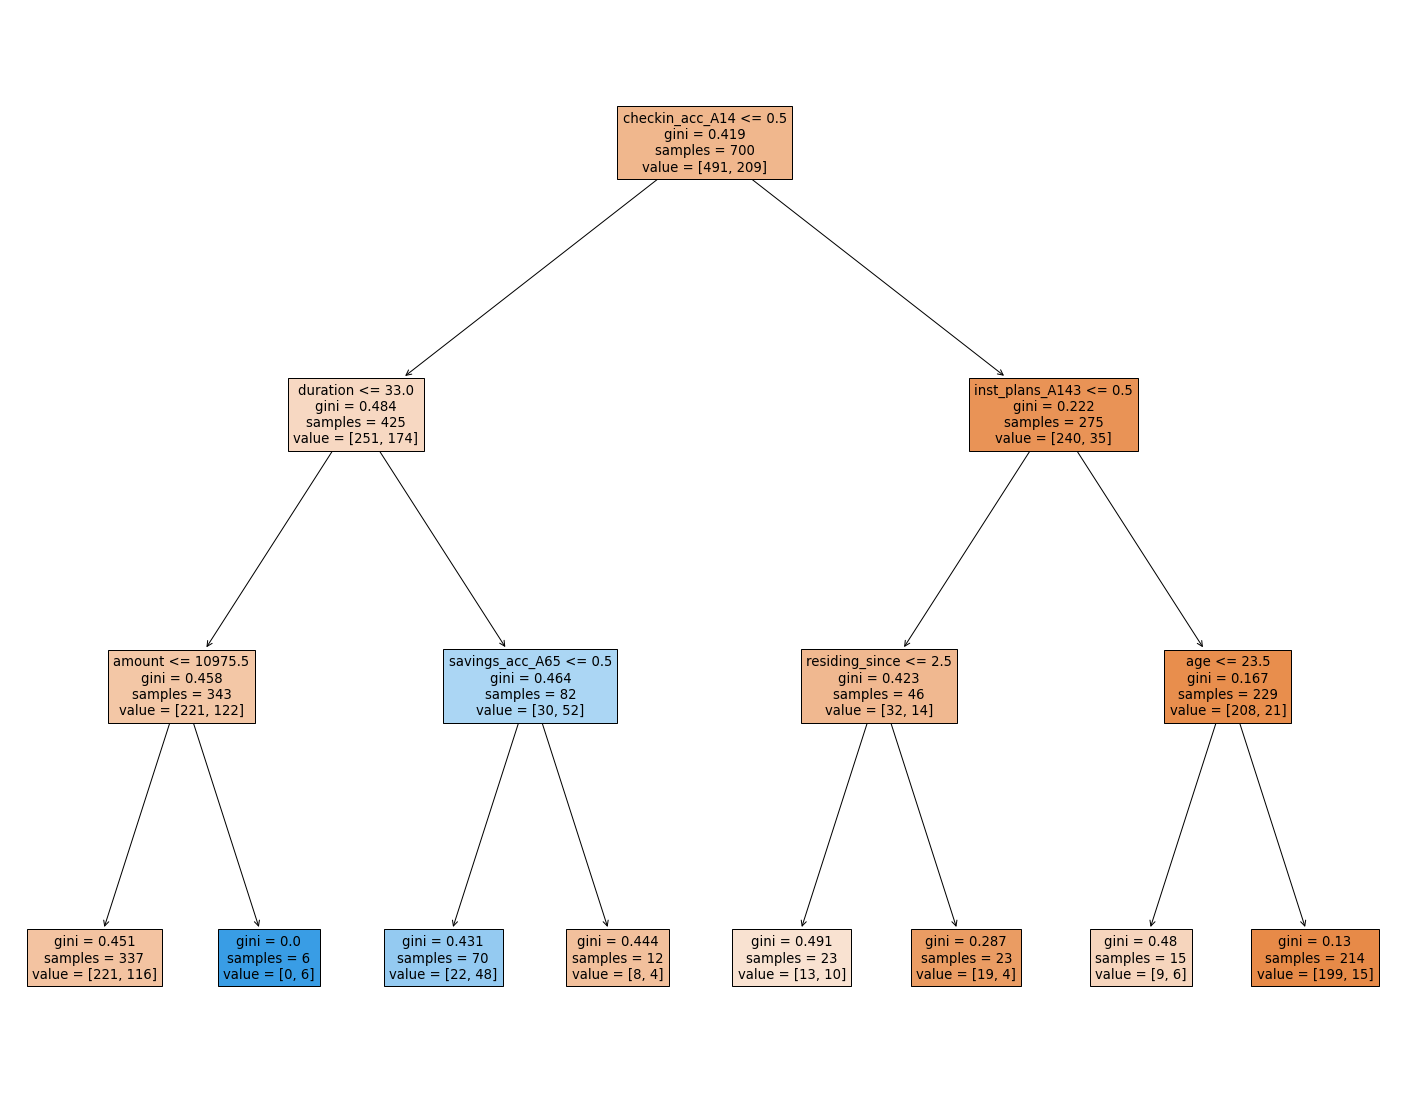

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree (model, feature_names = Xtrain.columns, filled = True)

In [16]:
from sklearn.model_selection import GridSearchCV
param = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,10)}]
model1 =DecisionTreeClassifier()
modelcv = GridSearchCV(model, param, cv=10, scoring = 'roc_auc')
modelcv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [17]:
modelcv.best_score_

0.6830090864917396

In [18]:
modelcv.best_params_

{'criterion': 'gini', 'max_depth': 4}

### Performance Matrix Decision Tree

In [19]:
predY = modelcv.predict(Xtest)

In [20]:
print(metrics.confusion_matrix(Ytest,predY))

[[186  23]
 [ 68  23]]


In [21]:
print(metrics.classification_report(Ytest, predY))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       209
           1       0.50      0.25      0.34        91

    accuracy                           0.70       300
   macro avg       0.62      0.57      0.57       300
weighted avg       0.66      0.70      0.66       300



In [22]:
auc = metrics.roc_auc_score(Ytest, modelcv.predict_proba(Xtest)[:,1])
auc

0.7093432882906567

### Random Forest

In [23]:
no_of_features = len(Xtrain.columns)

In [24]:
depth = int(np.log2(no_of_features))
depth

4

In [25]:
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=101)
modelrf.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=4, random_state=101)

In [26]:
auc = metrics.roc_auc_score(Ytest, modelrf.predict_proba(Xtest)[:,1])
auc

0.7701246122298755

### Grid Search

In [27]:
params = [{'max_depth':[5,10,15], 'n_estimators':[50,100,150], 'max_features':['sqrt',0.2,.3,.5]}]
modelrf = RandomForestClassifier(random_state=101)
modelcv = GridSearchCV(modelrf, params, cv=10, scoring='roc_auc')
modelcv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid=[{'max_depth': [5, 10, 15],
                          'max_features': ['sqrt', 0.2, 0.3, 0.5],
                          'n_estimators': [50, 100, 150]}],
             scoring='roc_auc')

In [28]:
modelcv.best_score_

0.7557102040816326

In [29]:
modelcv.best_params_

{'max_depth': 10, 'max_features': 0.3, 'n_estimators': 150}

### building model with best params

In [30]:
model_bp = RandomForestClassifier(max_depth=10, n_estimators=150, max_features=.3, oob_score=True, random_state=101)
model_bp.fit(Xtrain, Ytrain)

RandomForestClassifier(max_depth=10, max_features=0.3, n_estimators=150,
                       oob_score=True, random_state=101)

In [31]:
metrics.roc_auc_score(Ytest, model_bp.predict_proba(Xtest)[:,1])

0.7703875072296125

### Performance metrics- Random Forest


In [32]:
# 1.30.10

In [33]:
pred_y = model_bp.predict(Xtest)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [35]:
print(confusion_matrix(Ytest,pred_y))

[[195  14]
 [ 62  29]]


In [36]:
print(metrics.classification_report(Ytest, pred_y))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       209
           1       0.67      0.32      0.43        91

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.63       300
weighted avg       0.73      0.75      0.71       300



In [37]:
model_bp.oob_score_

0.75

### Drawing the RoC curve

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(Ytest, model_bp.predict_proba(Xtest)[:,1])

In [39]:
roc_auc = metrics.auc(fpr, tpr)

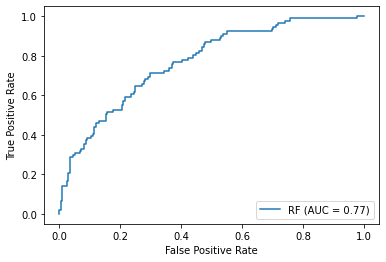

In [40]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='RF')
display.plot()
plt.show()

### Feature Importance

In [41]:
import seaborn as sn
# Create a dataframe to store the features and their corresponding
# importances

feature_rank = pd.DataFrame({'feature': Xtrain.columns, 'importance': model_bp.feature_importances_})

In [42]:

feature_rank = feature_rank.sort_values('importance', ascending = False)

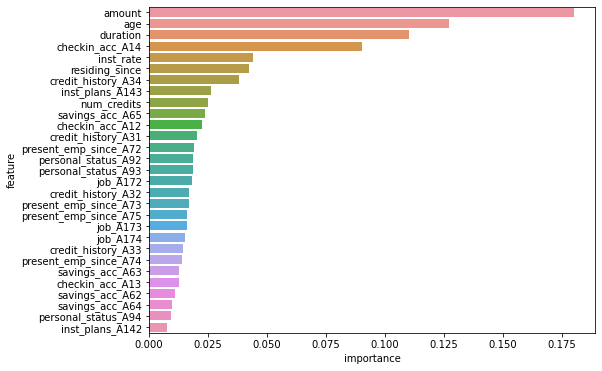

In [43]:
plt.figure(figsize=(8, 6))

# plot the values

sn.barplot(y = 'feature', x = 'importance', data = feature_rank);

In [44]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,amount,0.180274,18.027427
4,age,0.127211,30.748490
0,duration,0.110383,41.786748
8,checkin_acc_A14,0.090499,50.836698
2,inst_rate,0.044287,55.265374
3,residing_since,0.042421,59.507446
12,credit_history_A34,0.038151,63.322569
25,inst_plans_A143,0.026428,65.965382
5,num_credits,0.024940,68.459369
16,savings_acc_A65,0.023955,70.854881


### Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
dfbase = DecisionTreeClassifier(max_depth=10)
ada = AdaBoostClassifier(dfbase, n_estimators=250, random_state=101)
ada.fit(Xtrain, Ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=250, random_state=101)

### performance measure

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
predY = ada.predict(Xtest)

In [48]:
print(confusion_matrix(Ytest,predY))

[[189  20]
 [ 62  29]]


In [49]:
print(metrics.classification_report(Ytest,predY))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       209
           1       0.59      0.32      0.41        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



In [50]:
auc = metrics.roc_auc_score(Ytest,ada.predict_proba(Xtest)[:,1] )

In [51]:
auc

0.7717019822282981

### Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

modelgb = GradientBoostingClassifier(n_estimators=500, max_depth=10)
modelgb.fit(Xtrain,Ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [53]:
auc = metrics.roc_auc_score(Ytest, modelgb.predict_proba(Xtest)[:,1])
auc

0.7445712182554288

### Grid search cv

In [54]:
from sklearn.model_selection import GridSearchCV
param = [{'n_estimators': [100,200, 400], 'learning_rate':[0.01,.05,.5,.1]}]
model1 = GradientBoostingClassifier(random_state=101)
modelcv = GridSearchCV(model1, param, cv=10, scoring='roc_auc')
modelcv.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=101),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.5, 0.1],
                          'n_estimators': [100, 200, 400]}],
             scoring='roc_auc')

In [55]:
modelcv.best_params_

{'learning_rate': 0.05, 'n_estimators': 200}

In [56]:
modelcv.best_score_

0.7397752186588921

### Performance Measures - Gradient Boosting

In [57]:
predY = modelcv.predict(Xtest)

In [58]:
print(confusion_matrix(Ytest,predY))

[[187  22]
 [ 54  37]]


In [59]:
print(metrics.classification_report(Ytest,predY))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.63      0.41      0.49        91

    accuracy                           0.75       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.75      0.73       300



In [60]:
auc = metrics.roc_auc_score(Ytest,predY )
auc

0.6506651243493349